In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
ibc_df = pd.read_csv("incident-based_crime_08-12.csv", skiprows=1, skipfooter=35, engine="python")

# Clean Incident Based Crime

ibc_df["Geography"] = ibc_df["Geography"].str.replace(r"\s\(\d+(?:,\d+)*\)", '', regex=True)
ibc_df["Violations"] = ibc_df["Violations"].str.replace(r"\s\(\d+(?:,\d+)*\)", '', regex=True)
# ibc_df.head()
# ibc_df.tail()

In [3]:
provinces = ["Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador", "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan"]

provinces_crimes_df = ibc_df[ibc_df["Geography"].str.fullmatch("|".join(provinces))]

# Pivoted df contains the value Rate per 100k population of the differnt violations in 2008
pivoted_df = provinces_crimes_df.pivot_table(index="Violations", columns="Geography", values="2008").reset_index()

In [4]:
cities = ["Toronto", "Brampton", "Montreal", "Halifax", "Calgary", "Fredericton", "Vancouver"]
crimes = ["Homicide", "Murder, first degree", "Attempted murder", "Sexual assault, level 3 aggravated", "Sexual exploitation", "Assault, level 3, aggravated", "Robbery", "Kidnapping", "Extortion", "Incest", "Trafficking in persons", "Fraud", "Shoplifting over $5,000", "Arson", "Total prostitution", "Total impaired driving", "Total Drug violations"]

# Pivoted df contains the value Rate per 100k population of the differnt violations in 2008
pivoted_df = pivoted_df[pivoted_df["Violations"].str.contains("|".join(crimes), regex=True)].reset_index(drop=True)
pivoted_df

Geography,Violations,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,Arson,52.39,54.63,69.09,61.32,32.78,45.23,20.17,27.95,48.31,75.07
1,"Assault, level 3, aggravated",18.76,9.65,27.12,7.77,5.73,9.07,10.08,1.43,3.32,35.91
2,Attempted murder,2.12,2.30,2.99,0.94,0.39,3.20,2.13,0.72,1.97,3.16
3,Extortion,3.17,6.16,1.16,1.87,0.59,3.31,3.71,2.87,5.83,1.58
4,Fraud,350.96,321.76,206.77,256.26,224.35,293.98,279.88,253.68,209.69,316.83
5,Homicide,3.06,2.67,4.48,0.40,0.99,1.28,1.36,1.43,1.19,2.96
6,Total impaired driving,475.34,326.25,251.06,364.03,312.63,284.49,145.00,333.22,211.31,605.95
7,Total prostitution,19.04,19.27,15.43,8.84,2.76,10.13,8.27,0.00,8.41,20.12


In [5]:
"""
Idea is for analyzing crimes in different cities, use total violations
Then for trends over time use the incident base crime from canada
for analyzing and identifying regions with higher or lower crime rates 
For analyzig crime rate use line charts with different colours the show different crimes, general canada crimes, use 2015 data
For comparing crime rates with socioeconomic factors use 2016 census data of cities with the analyzed crime rate
"""

'\nIdea is for analyzing crimes in different cities, use total violations\nThen for trends over time use the incident base crime from canada\nfor analyzing and identifying regions with higher or lower crime rates \nFor analyzig crime rate use line charts with different colours the show different crimes, general canada crimes, use 2015 data\nFor comparing crime rates with socioeconomic factors use 2016 census data of cities with the analyzed crime rate\n'

In [6]:
canada_crime_rate = ibc_df[ibc_df["Geography"].str.fullmatch("Canada")]
canada_crime_rate = canada_crime_rate[canada_crime_rate["Violations"].str.contains("|".join(crimes), regex=True)]
canada_crime_rate.reset_index(inplace=True)
canada_crime_rate.drop(columns=["Geography", "index"], inplace=True)
canada_crime_rate.set_index("Violations", inplace=True)

# canada_crime_rate contains the value Rate per 100k population of the differnt violations in 2008, 2009, 2010, 2011, 2012
canada_crime_rate

,2008,2009,2010,2011,2012
Violations,,,,,
Homicide,1.83,1.81,1.62,1.73,1.56
Attempted murder,2.16,2.37,1.96,1.93,1.94
"Assault, level 3, aggravated",10.78,10.73,10.20,10.23,10.07
Extortion,4.21,5.09,4.62,4.43,4.91
Fraud,274.22,267.34,239.58,225.44,224.86
Arson,40.13,39.74,35.85,30.16,31.65
Total prostitution,11.47,10.48,8.85,7.11,5.95
Total impaired driving,254.20,261.82,255.61,259.85,242.21


In [7]:
# import chardet
# with open("Fredericton_Census_Data_2016.csv", "rb") as f:
#     result = chardet.detect(f.read())
#     print(result)  # Check the detected encoding

In [8]:

cities_census_dfs = [pd.read_csv(f"CensusData/{city}_Census_Data_2016.csv", skiprows=[0, 2], skipfooter=540, encoding="ISO-8859-1", engine="python") for city in cities]

census_data = ["Population; 2016", "Median total income in 2015 among recipients ($)", "Average total income in 2015 among recipients ($)", "Immigrants", "Non-immigrants"]

# immigrant_country = ["Asia", "Africa", "Europe"]
# To make analysis easier you could remove this part, (comment out the part that filters out Immigrants by selected place of birth)
immigrant_country = ["Brazil", "United Kingdom", "Nigeria", "India", "China"]
socio_economic_dfs = [
    df[
        (df["Characteristics"] == "Population; 2016") |
        (df["Characteristics"].str.strip() == "Median total income in 2015 among recipients ($)") |
        (df["Characteristics"].str.strip() == "Average total income in 2015 among recipients ($)") |
        ((df["Topic"].str.strip() == "Immigrant status and period of immigration") & (df["Characteristics"].str.strip() == "Immigrants")) |
        ((df["Topic"].str.strip() == "Immigrants by selected place of birth") & (df["Characteristics"].str.strip().str.fullmatch("|".join(immigrant_country)))) |
        ((df["Topic"].str.strip() == "Admission category and applicant type") & (df["Characteristics"].str.strip() == "Refugees")) |
        ((df["Topic"].str.strip() == "Highest certificate; diploma or degree") & (df["Characteristics"].str.strip() == "No certificate; diploma or degree")) |
        # ((df["Topic"].str.strip() == "Major field of study - Classification of Instructional Programs (CIP) 2016") & (df["Characteristics"].str.strip() == "Mathematics; computer and information sciences")) |
        ((df["Topic"].str.strip() == "Labour force status") & (df["Characteristics"].str.strip() == "Unemployed"))
    ]
    for df in cities_census_dfs
]

cities_census_dfs[0].head(10)
for index, df in enumerate(socio_economic_dfs):
    socio_economic_dfs[index] = df.loc[:, ["Characteristics", "Total", "Male", "Female"]].reset_index().drop(columns="index").drop_duplicates(subset=["Characteristics"], keep="last")

socio_economic_dfs[0]

characteristics = {
    "Population; 2016": "Population", "Median total income in 2015 among recipients ($)": "Median total income", "Average total income in 2015 among recipients ($)": "Average total income", 
    "Brazil": "Brazil Immigrants", "United Kingdom": "United Kingdom Immigrants", "Nigeria": "Nigeria Immigrants", "China": "China Immigrants", "India": "India Immigrants"}

for index, df in enumerate(socio_economic_dfs):
    total_population = df.at[0, "Total"]
    socio_economic_dfs[index]["Rate per 100k population"] = df["Total"]
    socio_economic_dfs[index].loc[3:, "Rate per 100k population"] = df.iloc[3:,:]["Total"].apply(lambda x: (x/total_population)*100000)
    socio_economic_dfs[index] = socio_economic_dfs[index].drop(0).reset_index(drop=True)

    for key, value in characteristics.items():
            socio_economic_dfs[index].loc[socio_economic_dfs[index]["Characteristics"].str.strip() == key, "Characteristics"] = value

In [9]:
merge_prep_dfs = [df.loc[:, ["Characteristics", "Rate per 100k population"]].rename(columns={"Rate per 100k population": f"{cities[index]} Rate per 100k population"}) for index, df in enumerate(socio_economic_dfs)]

merged_socio_economic_df = merge_prep_dfs[0]
merged_socio_economic_df["Characteristics"] = [txt.strip() for txt in merged_socio_economic_df["Characteristics"]]

for df in merge_prep_dfs[1:]:
    df["Characteristics"] = [txt.strip() for txt in df["Characteristics"]]
    merged_socio_economic_df = pd.merge(merged_socio_economic_df, df, how="left", on="Characteristics")


merged_socio_economic_df

,Characteristics,Toronto Rate per 100k population,Brampton Rate per 100k population,Montreal Rate per 100k population,Halifax Rate per 100k population,Calgary Rate per 100k population,Fredericton Rate per 100k population,Vancouver Rate per 100k population
0,Median total income,30089.000000,29092.000000,28321.000000,36098.000000,43333.000000,33615.000000,32964.000000
1,Average total income,52268.000000,37647.000000,40079.000000,46440.000000,67741.000000,43116.000000,50317.000000
2,Immigrants,46347.138698,52016.548806,33492.227931,9227.769633,30911.783218,11070.079011,41610.582024
3,Brazil Immigrants,257.178012,65.696603,207.075287,33.487874,114.588209,17.176228,163.107337
4,United Kingdom Immigrants,1475.158434,1461.328284,241.392297,1461.063525,1787.414664,1116.454827,2053.885597
5,Nigeria Immigrants,278.411215,672.126784,45.169397,71.936914,595.939381,128.821711,20.586363
6,China Immigrants,4813.164293,488.513202,1562.157197,581.696769,2788.044092,1236.688423,10571.889163
7,India Immigrants,2900.345625,20830.876730,594.534855,465.109357,3580.074563,472.346273,2058.636296
8,Refugees,6447.571745,5062.007486,4331.569185,1012.077960,3732.993335,1751.975266,2822.707075
9,No certificate; diploma or degree,5849.930315,7160.087461,6307.876956,4673.418814,4755.007182,2928.546891,4340.555452


In [10]:
cities_crime_dfs = [pd.read_csv(f"CrimeData/{city}_Crime_Data.csv") for city in cities]

for df in cities_crime_dfs:
    df["GEO"] = df["GEO"].str.replace(r"\s\[\d+(?:,\d+)*\]", '', regex=True)
    df["Violations"] = df["Violations"].str.replace(r"\s\[\d+(?:,\d+)*\]", '', regex=True)

cleaned_cities_cime_dfs = [df[df["Statistics"] == "Rate per 100,000 population"].loc[:, ["REF_DATE", "Violations", "Statistics", "VALUE"]] for df in cities_crime_dfs]

cleaned_cities_cime_dfs[0].head(10)

for index in range(len(cities)):
    cleaned_cities_cime_dfs[index].rename(columns={"VALUE": cities[index]}, inplace=True)

In [11]:
merged_cities_crime_df = cleaned_cities_cime_dfs[0]

for df in cleaned_cities_cime_dfs[1:]:
    merged_cities_crime_df = pd.merge(merged_cities_crime_df, df.drop(columns=["Violations", "Statistics"]), how="left", on="REF_DATE")

merged_cities_crime_df.reset_index(inplace=True)
merged_cities_crime_df.drop(columns="index",  inplace=True)
merged_cities_crime_df.set_index("REF_DATE", inplace=True)
merged_cities_crime_df

,Violations,Statistics,Toronto,Brampton,Montreal,Halifax,Calgary,Fredericton,Vancouver
REF_DATE,,,,,,,,,
2015,"Total, all violations","Rate per 100,000 population",3818.31,3059.30,4947.02,5501.50,5431.29,6308.71,8264.09
2016,"Total, all violations","Rate per 100,000 population",3938.59,3100.57,4727.04,5337.91,5670.31,6534.47,8776.22
2017,"Total, all violations","Rate per 100,000 population",4142.40,3221.90,4709.81,5691.71,5860.16,6625.72,8719.18
2018,"Total, all violations","Rate per 100,000 population",4529.21,3335.07,4534.26,5773.81,6528.90,6009.45,8729.38
2019,"Total, all violations","Rate per 100,000 population",4589.50,2912.61,4836.96,5349.86,7050.56,6446.83,8754.07
2020,"Total, all violations","Rate per 100,000 population",3865.85,2540.33,4311.27,5059.29,5878.82,6536.24,7428.96
2021,"Total, all violations","Rate per 100,000 population",3991.92,2507.39,4608.61,5251.49,5705.70,6927.35,6426.91
2022,"Total, all violations","Rate per 100,000 population",4601.99,3055.66,5163.13,6029.66,6126.09,8706.11,6609.66
2023,"Total, all violations","Rate per 100,000 population",5326.74,3408.14,5415.87,5967.30,5681.60,8852.26,6924.62


In [ ]:
# Plot 2015 crime rate with the cleaned census data
# Plot line chart of cities crime rate for 2015-2023
# Plot grouped bar chart for crime rate of different crimes in canada from 2008-2012
# Plot bar chart for Homicide crime rate in different provinces
# Scatter plot correlating socio-economic indicators vs crime rate

In [ ]:
# Analyzing Canada Crime Trend (2008–2012)
canada_trends = canada_crime_rate.T
canada_trends.index.name = "Year"
canada_trends.reset_index(inplace=True)
display(canada_trends.head())

# Analyzing Crime Rate by Province (2008)
fraud_2008 = pivoted_df[pivoted_df["Violations"] == "Fraud"]
fraud_values = fraud_2008.drop(columns="Violations").T
fraud_values.columns = ["Fraud Rate"]
fraud_sorted = fraud_values.sort_values(by="Fraud Rate", ascending=False)
print("Fraud rates per 100k population by province (2008):")
display(fraud_sorted)

homicide_2008 = pivoted_df[pivoted_df["Violations"] == "Homicide"]
homicide_values = homicide_2008.drop(columns="Violations").T
homicide_values.columns = ["Homicide Rate"]
homicide_sorted = homicide_values.sort_values(by="Homicide Rate", ascending=False)
print("Homicide rates per 100k population by province (2008):")
display(homicide_sorted)

Violations,Year,Homicide,Attempted murder,"Assault, level 3, aggravated",Extortion,Fraud,Arson,Total prostitution,Total impaired driving
0,2008,1.83,2.16,10.78,4.21,274.22,40.13,11.47,254.20
1,2009,1.81,2.37,10.73,5.09,267.34,39.74,10.48,261.82
2,2010,1.62,1.96,10.20,4.62,239.58,35.85,8.85,255.61
3,2011,1.73,1.93,10.23,4.43,225.44,30.16,7.11,259.85
4,2012,1.56,1.94,10.07,4.91,224.86,31.65,5.95,242.21


Fraud rates per 100k population by province (2008):


,Fraud Rate
Geography,
Alberta,350.96
British Columbia,321.76
Saskatchewan,316.83
Nova Scotia,293.98
Ontario,279.88
New Brunswick,256.26
Prince Edward Island,253.68
Newfoundland and Labrador,224.35
Quebec,209.69


Homicide rates per 100k population by province (2008):


,Homicide Rate
Geography,
Manitoba,4.48
Alberta,3.06
Saskatchewan,2.96
British Columbia,2.67
Prince Edward Island,1.43
Ontario,1.36
Nova Scotia,1.28
Quebec,1.19
Newfoundland and Labrador,0.99


In [ ]:
# Analyzing Crime Rates in Cities (2015)
crime_by_year = merged_cities_crime_df.reset_index()

crime_2015 = crime_by_year[(crime_by_year["REF_DATE"] == 2015) & (crime_by_year["Violations"] == "Total, all violations")]
crime_2015 = crime_2015.drop(columns=["REF_DATE", "Violations", "Statistics"]).T.reset_index()
crime_2015.columns = ["City", "Total Crime Rate"]
display(crime_2015.sort_values(by="Total Crime Rate", ascending=False))


# Comparing crime rate with socio-economic factors
cleaned_columns = [col.replace(" Rate per 100k population", "") if col != "Characteristics" else col for col in merged_socio_economic_df.columns] # Can just remove this from the merge to avoid this part
merged_socio_economic_df.columns = cleaned_columns

socio_transposed = merged_socio_economic_df.set_index("Characteristics").T.reset_index()
socio_transposed.rename(columns={"index": "City"}, inplace=True)

merged_city_crime = pd.merge(socio_transposed, crime_2015, on="City")
display(merged_city_crime)

factors_to_check = ["Median total income", "Immigrants", "Unemployed"]

print("📊 Correlation between Total Crime Rate and Socio-Economic Indicators:\n")
for factor in factors_to_check:
    corr = merged_city_crime["Total Crime Rate"].corr(merged_city_crime[factor])
    print(f"{factor}: {corr:.3f}")

,City,Total Crime Rate
6,Vancouver,8264.09
5,Fredericton,6308.71
3,Halifax,5501.50
4,Calgary,5431.29
2,Montreal,4947.02
0,Toronto,3818.31
1,Brampton,3059.30


,City,Median total income,Average total income,Immigrants,Brazil Immigrants,United Kingdom Immigrants,Nigeria Immigrants,China Immigrants,India Immigrants,Refugees,No certificate; diploma or degree,Unemployed,Total Crime Rate
0,Toronto,30089.0,52268.0,46347.138698,257.178012,1475.158434,278.411215,4813.164293,2900.345625,6447.571745,5849.930315,4477.460040,3818.31
1,Brampton,29092.0,37647.0,52016.548806,65.696603,1461.328284,672.126784,488.513202,20830.876730,5062.007486,7160.087461,4471.580323,3059.30
2,Montreal,28321.0,40079.0,33492.227931,207.075287,241.392297,45.169397,1562.157197,594.534855,4331.569185,6307.876956,4901.759495,4947.02
3,Halifax,36098.0,46440.0,9227.769633,33.487874,1461.063525,71.936914,581.696769,465.109357,1012.077960,4673.418814,4094.202629,5501.50
4,Calgary,43333.0,67741.0,30911.783218,114.588209,1787.414664,595.939381,2788.044092,3580.074563,3732.993335,4755.007182,5593.437808,5431.29
5,Fredericton,33615.0,43116.0,11070.079011,17.176228,1116.454827,128.821711,1236.688423,472.346273,1751.975266,2928.546891,4757.815184,6308.71
6,Vancouver,32964.0,50317.0,41610.582024,163.107337,2053.885597,20.586363,10571.889163,2058.636296,2822.707075,4340.555452,3296.193423,8264.09


📊 Correlation between Total Crime Rate and Socio-Economic Indicators:

Median total income: 0.325
Immigrants: -0.379
Unemployed: -0.456


## 🔍 Analysis

### Analyzing National Crime Trends (2008–2012)

The dataset `canada_crime_rate` shows national trends for selected violations. Between 2008 and 2012, violent crimes such as **Homicide**, **Attempted Murder**, and **Aggravated Assault** generally declined. This suggests a possible improvement in public safety over those years. However, rates of **Extortion** increased

---

### Analyzing Crime Rate by Province (2008)

Using the `pivoted_df`, we compared provincial crime rates in 2008. Highlights include:

- **British Columbia**, **Alberta**, and **Saskatchewan** recorded the highest rates of **Fraud**.
- **Manitoba** and **Alberta** also showed increased **Homicide** rates.
- **Newfoundland and Labrador** and **Quebec** reported the lowest rates in most categories.

---

### Analyzing Crime Rates in Cities (2015)

City-level crime data (`merged_cities_crime_df`) for 2015 showed:

- **Vancouver**, and **Fredericton** had the highest crime rates respectively.
- While cities like **Brampton** and **Toronto** had significantly lower crime rates compared to the cities with the highest crime rates.

---

### Comparing crime rate with socio-economic factors
- **Median total income (0.325)**: This shows a slight positive correlation between median income and crime rates. It suggests that as median income increases across these Canadian cities, crime rates tend to increase as well. This is a contradiction to what might be expected, as higher incomes are often associated with lower crime rates.
- **Immigrants (-0.379)**: There's a slight negative correlation between immigrant population and crime rates. This indicates that cities with higher immigrant populations tend to have lower crime rates. This contradicts common misconceptions that immigration increases crime rate.
- **Unemployed (-0.456)**: This shows the strongest correlation of the three factors, with a slight negative relationship between unemployment and crime rates. This suggests that cities with higher unemployment actually have lower crime rates, which contradicts theories that link unemployment to increased crime.
---

###  Visualizations

- 🏙️ Bar Chart — 2015 Crime Rates by City (based on cleaned census data)
- 📈 Line Chart — City Crime Rates Over Time (2015–2023)
- 📊 Normalized Grouped Bar Chart — Normalized Crime Rates by Type Across Provinces (2008)
- 📍 Bar Chart — Homicide Rates by Province (2008)
- 🔵 Scatter Plots — Socio-Economic Indicators vs. Total Crime Rate (e.g., Income, Unemployment)

---

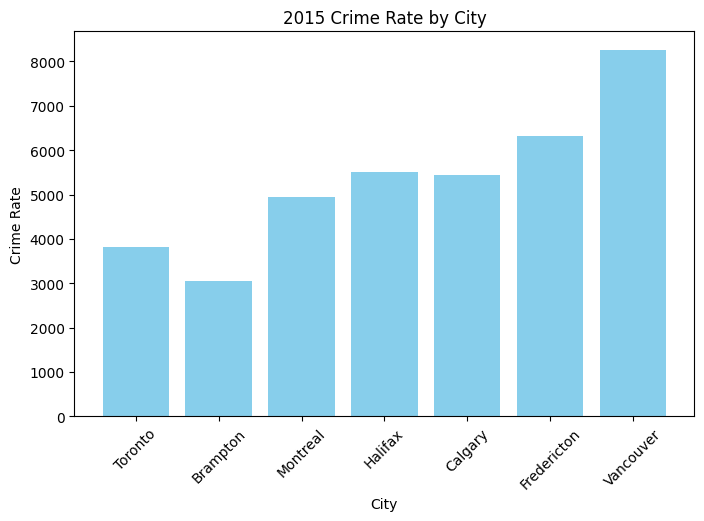

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(crime_2015['City'], crime_2015['Total Crime Rate'], color='skyblue')
plt.title("2015 Crime Rate by City")
plt.xlabel("City")
plt.ylabel("Crime Rate")
plt.xticks(rotation=45)
plt.show()


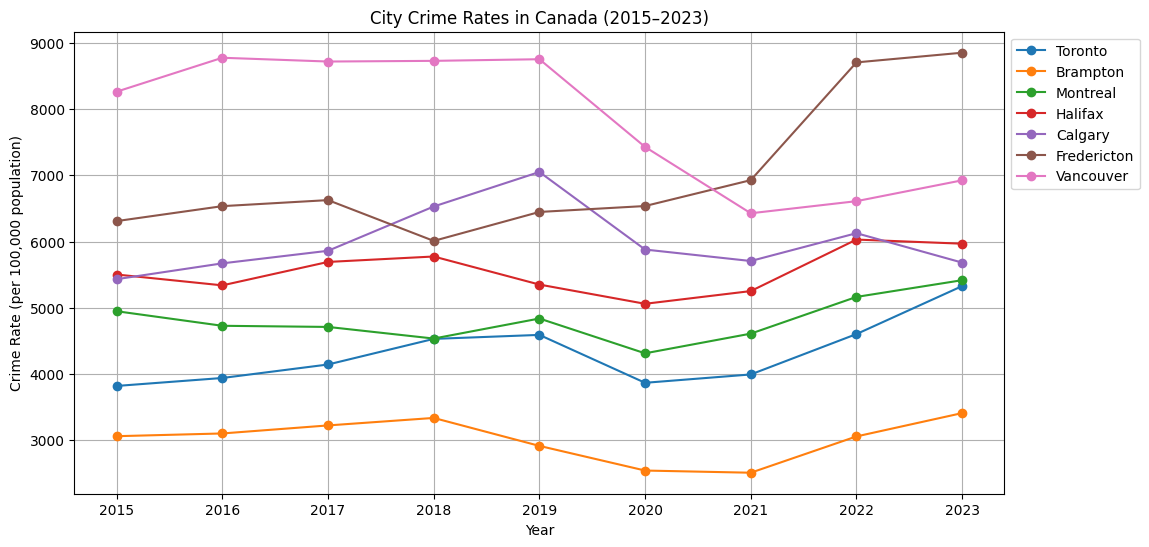

In [29]:
# Plot line chart for all cities from 2015 to 2023
plt.figure(figsize=(12, 6))

# List of cities (excluding metadata columns)
cities = ['Toronto', 'Brampton', 'Montreal', 'Halifax', 'Calgary', 'Fredericton', 'Vancouver']

for city in cities:
    plt.plot(
        merged_cities_crime_df.index,
        merged_cities_crime_df[city],
        marker='o',
        label=city
    )

plt.title("City Crime Rates in Canada (2015–2023)")
plt.xlabel("Year")
plt.ylabel("Crime Rate (per 100,000 population)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


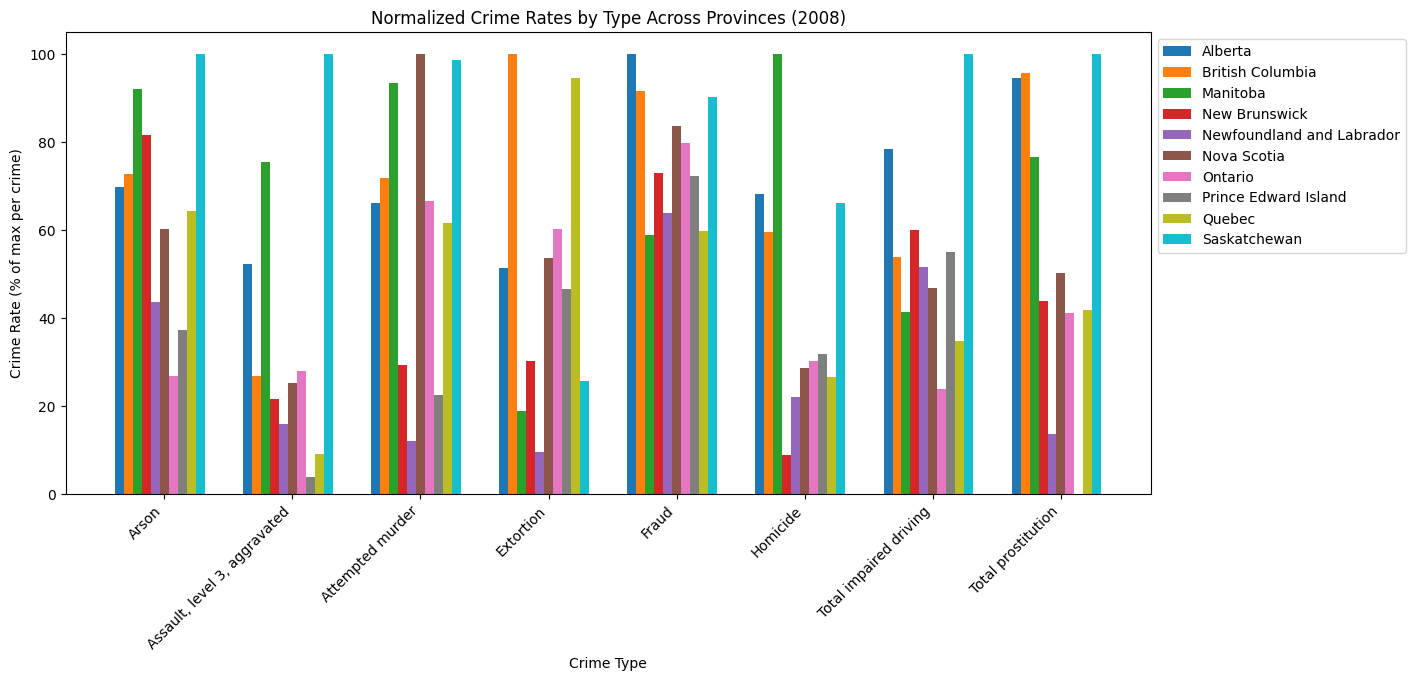

In [ ]:
#Normalized Grouped Bar Chart- Shows how each province compares relative to the highest for that crime.
provinces = pivoted_df.columns[1:]
crime_types = pivoted_df['Violations']
x = np.arange(len(crime_types))
bar_width = 0.07

# Normalizing values per crime type
normalized_df = pivoted_df.copy()
for i in range(len(pivoted_df)):
    row = pivoted_df.iloc[i, 1:]
    max_val = row.max()
    normalized_df.iloc[i, 1:] = (row / max_val) * 100 if max_val != 0 else 0

plt.figure(figsize=(14, 6))

for i, province in enumerate(provinces):
    plt.bar(
        x + i * bar_width,
        normalized_df[province],
        width=bar_width,
        label=province,
    )

# Formatting
plt.title("Normalized Crime Rates by Type Across Provinces (2008)")
plt.xlabel("Crime Type")
plt.ylabel("Crime Rate (% of max per crime)")
plt.xticks(x + bar_width * len(provinces) / 2, crime_types, rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


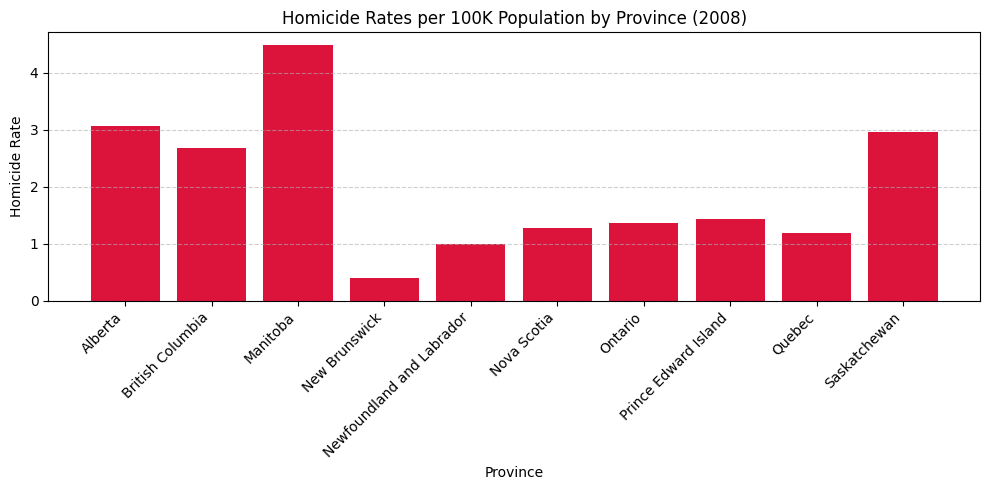

In [25]:
plt.figure(figsize=(10, 5))
plt.bar(homicide_values.index, homicide_values["Homicide Rate"], color='crimson')

plt.title("Homicide Rates per 100K Population by Province (2008)")
plt.xlabel("Province")
plt.ylabel("Homicide Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


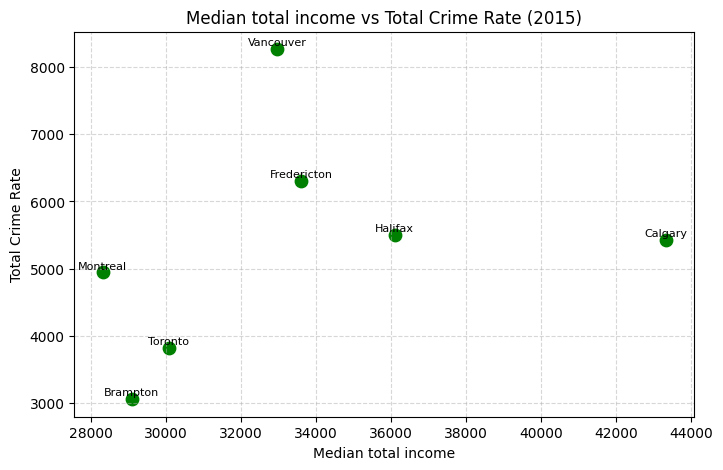

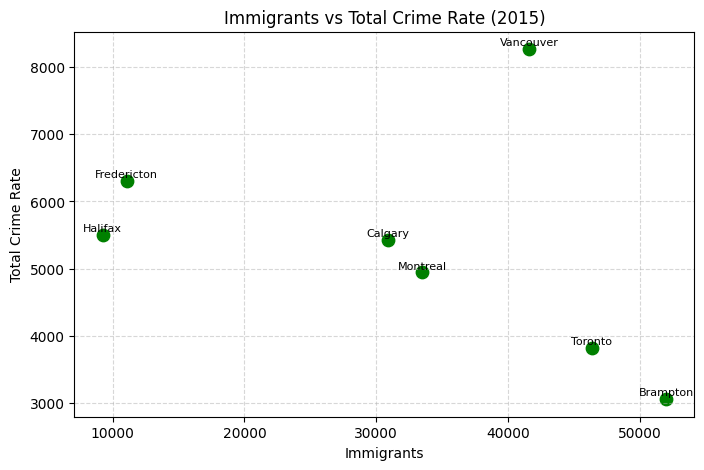

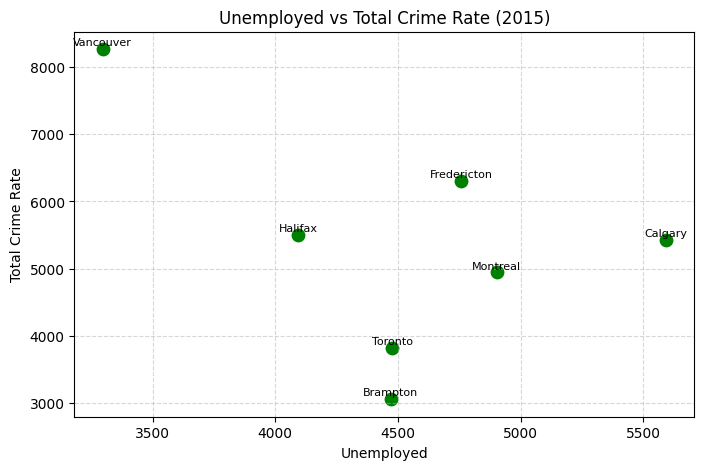

In [34]:
factors_to_check = ["Median total income", "Immigrants", "Unemployed"]

for factor in factors_to_check:
    plt.figure(figsize=(8, 5))
    plt.scatter(merged_city_crime[factor], merged_city_crime["Total Crime Rate"], color='green', s=80)

    # Label points with city names
    for i, row in merged_city_crime.iterrows():
        plt.text(row[factor], row["Total Crime Rate"] + 50, row["City"], fontsize=8, ha='center')

    plt.title(f"{factor} vs Total Crime Rate (2015)")
    plt.xlabel(factor)
    plt.ylabel("Total Crime Rate")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()